In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
max([max(sequence) for sequence in train_data]) # since we are restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”	
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
# encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        #1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          #2
    return results

x_train = vectorize_sequences(train_data)                  #3
x_test = vectorize_sequences(test_data)                    #4

#1 - Creates an all-zero matrix of shape (len(sequences), dimension)
#2 - Sets specific indices of results[i] to 1s
#3 - Vectorized training data
#4 - Vectorized test data
         

In [48]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [42]:
from keras import models 
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [45]:
# configuring the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [46]:
# using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
              
              )

In [47]:
len(x_train)

25000

In [49]:
# setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc']
              )

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, # train the model for 20 iterations over all samples in the x_train and y_train tensors
                    batch_size=512, # mini batches of 512
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.6861 - loss: 0.6058 - val_acc: 0.8567 - val_loss: 0.4072
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8879 - loss: 0.3473 - val_acc: 0.8615 - val_loss: 0.3454
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9183 - loss: 0.2514 - val_acc: 0.8896 - val_loss: 0.2866
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9424 - loss: 0.1906 - val_acc: 0.8872 - val_loss: 0.2808
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9513 - loss: 0.1613 - val_acc: 0.8889 - val_loss: 0.2778
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9602 - loss: 0.1307 - val_acc: 0.8742 - val_loss: 0.3171
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9682 - loss: 0.1159 - val_acc: 0.8833 - val_loss: 0.3006
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9730 - loss: 0.0982 - val_acc: 0.8854 - val_loss: 0.3121
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9784 - l

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

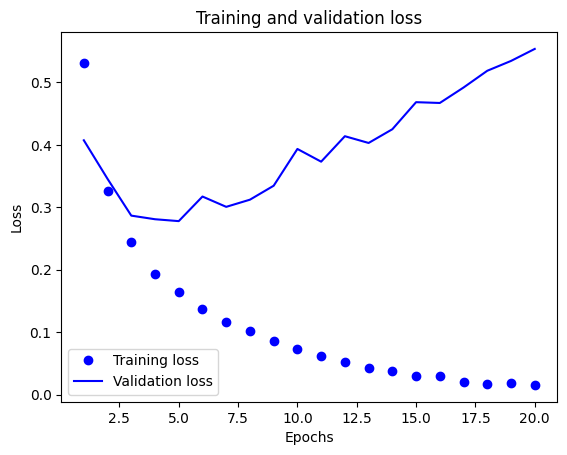

In [56]:
# plot training and validation loss
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' is for 'bue dot'
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' is for 'solid blue line'
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

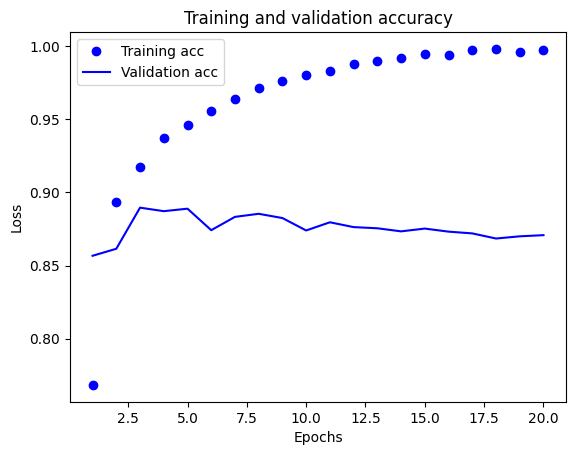

In [57]:
# plot the training and validation accuracy

plt.clf() # clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [58]:
# retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7288 - loss: 0.5749
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9004 - loss: 0.2972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9250 - loss: 0.2192
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9351 - loss: 0.1858
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.8857 - loss: 0.2864


In [59]:
results

[0.28378868103027344, 0.8877599835395813]

In [60]:
# using a trained network to generate predictions on new data

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step


array([[0.22814889],
       [0.9995383 ],
       [0.9421244 ],
       ...,
       [0.12373471],
       [0.10412601],
       [0.6699821 ]], dtype=float32)

In [61]:
len(x_test)

25000

In [63]:
# retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7556 - loss: 0.5539
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8982 - loss: 0.3211
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9154 - loss: 0.2495
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9297 - loss: 0.2131
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.8881 - loss: 0.2793


In [64]:
results

[0.2787969708442688, 0.889240026473999]

In [65]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7249 - loss: 0.1833
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9001 - loss: 0.0896
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9168 - loss: 0.0714
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9311 - loss: 0.0585
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8832 - loss: 0.0856


In [66]:
results

[0.08516011387109756, 0.8840799927711487]

# Single label, multiclass classification

In [67]:
from keras.datasets import reuters 

# widely used toy dataset for text classification - 46 different topics

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
len(train_data)

8982

In [69]:
len(test_data)

2246

In [70]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [72]:
# decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [73]:
train_labels[0] # the label associated with an example is an integer between 0 and 45 - a topic index

3

In [74]:
# Preparing the data

# encoding the data

import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [76]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [79]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [81]:
# Building the network

from keras import models, layers 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [82]:
# compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [83]:
# validating approach

x_val = x_train[:1000] # set aside 1000 samples for validation
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



In [85]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9672 - loss: 0.0751 - val_accuracy: 0.8030 - val_loss: 1.3981
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9643 - loss: 0.0684 - val_accuracy: 0.8030 - val_loss: 1.4316
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9653 - loss: 0.0660 - val_accuracy: 0.7960 - val_loss: 1.4551
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9626 - loss: 0.0695 - val_accuracy: 0.8000 - val_loss: 1.4673
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9630 - loss: 0.0657 - val_accuracy: 0.8030 - val_loss: 1.4680
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9626 - loss: 0.0654 - val_accuracy: 0.7970 - val_loss: 1.4809
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9660 - loss: 0.0588 - val_accuracy: 0.8020 - val_loss: 1.4863
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9669 - loss: 0.0582 - val_accuracy: 0.7990 - v

In [87]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

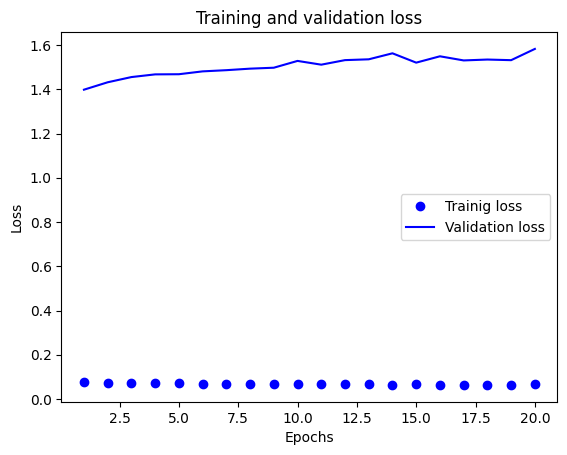

In [88]:
# plotting the training and validation loss

import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Trainig loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

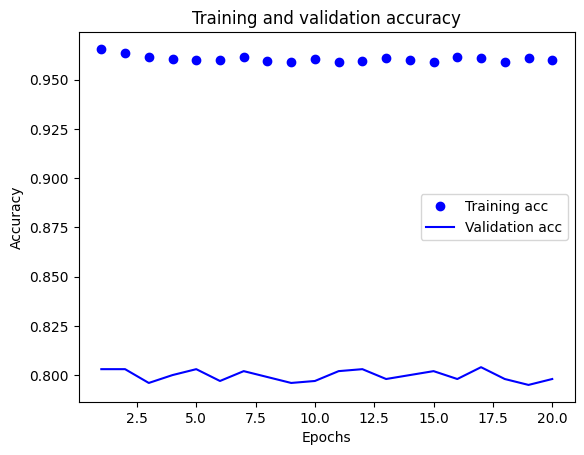

In [91]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [92]:
# retraining model from scratch

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,  y_val)
          
          )
results = model.evaluate(x_test, one_hot_test_labels)

/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3791 - loss: 3.2015 - val_accuracy: 0.6340 - val_loss: 1.8580
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6723 - loss: 1.6794 - val_accuracy: 0.6980 - val_loss: 1.3906
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7385 - loss: 1.2347 - val_accuracy: 0.7300 - val_loss: 1.2226
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7869 - loss: 0.9827 - val_accuracy: 0.7560 - val_loss: 1.1155
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8183 - loss: 0.8250 - val_accuracy: 0.7830 - val_loss: 1.0213
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8513 - loss: 0.6650 - val_accuracy: 0.7980 - val_loss: 0.9768
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8848 - loss: 0.5573 - val_accuracy: 0.8130 - val_loss: 0.9343
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9039 - loss: 0.4548 - val_accuracy: 0.8110 - val_loss:

In [93]:
results

[0.9856223464012146, 0.7831701040267944]

In [94]:
import copy 

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array

array([False, False, False, ..., False,  True, False])

In [95]:
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

In [96]:
np.sum(hits_array)

428

In [97]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
predictions[0].shape

(46,)

In [99]:
np.sum(predictions[0])

1.0000001

In [100]:
np.argmax(predictions[0]) # largest entry is the predicted class - the class with the highest probability

3

In [101]:
# different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [102]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
              )

In [104]:
# importance of having sufficiently large intermediate layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)
          
          )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2526 - loss: 3.4637 - val_accuracy: 0.3550 - val_loss: 2.7370
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3533 - loss: 2.5987 - val_accuracy: 0.3560 - val_loss: 2.3122
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3564 - loss: 2.2004 - val_accuracy: 0.3610 - val_loss: 2.0041
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3946 - loss: 1.8112 - val_accuracy: 0.5170 - val_loss: 1.7796
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5412 - loss: 1.6218 - val_accuracy: 0.5540 - val_loss: 1.6556
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5568 - loss: 1.4728 - val_accuracy: 0.5630 - val_loss: 1.6105
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5680 - loss: 1.4241 - val_accuracy: 0.5800 - val_loss: 1.6063
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6004 - loss: 1.3782 - val_accuracy: 0.5910 - val_loss:

In [106]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 1.8687


[1.9782284498214722, 0.606856644153595]

In [107]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)
          
          )
results = model.evaluate(x_test, one_hot_test_labels)
results


/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5459 - loss: 2.5125 - val_accuracy: 0.7340 - val_loss: 1.2100
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7772 - loss: 1.0318 - val_accuracy: 0.8030 - val_loss: 0.9791
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8663 - loss: 0.6764 - val_accuracy: 0.8250 - val_loss: 0.8499
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9023 - loss: 0.5007 - val_accuracy: 0.8290 - val_loss: 0.7881
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9206 - loss: 0.3648 - val_accuracy: 0.8370 - val_loss: 0.7734
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.2773 - val_accuracy: 0.8230 - val_loss: 0.7778
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9480 - loss: 0.2272 - val_accuracy: 0.8400 - val_loss: 0.7707
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9496 - loss: 0.1962 - val_accuracy: 0.8320 - val_loss

[1.0625338554382324, 0.7996438145637512]

In [108]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val)
          
          )
results = model.evaluate(x_test, one_hot_test_labels)
results


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5159 - loss: 2.3416 - val_accuracy: 0.7170 - val_loss: 1.2437
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7735 - loss: 1.0153 - val_accuracy: 0.7690 - val_loss: 1.0210
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.6614 - val_accuracy: 0.8040 - val_loss: 0.8950
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9089 - loss: 0.4342 - val_accuracy: 0.8150 - val_loss: 0.8574
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9315 - loss: 0.3034 - val_accuracy: 0.8300 - val_loss: 0.8463
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9468 - loss: 0.2312 - val_accuracy: 0.8120 - val_loss: 0.9236
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9529 - loss: 0.1892 - val_accuracy: 0.8010 - val_loss: 0.9418
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9565 - loss: 0.1656 - val_accuracy: 0.8050 - val_loss

[1.2060785293579102, 0.7894033789634705]

# Regression

In [109]:
# load the boston housing dataset

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [110]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [111]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [112]:
# normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean 
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean 
test_data /= std 

In [113]:
train_data.shape

(404, 13)

In [114]:
# model definition

from keras import models 
from keras import layers 

def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # single unit and no activation activation (it will be a linear layer)

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model




In [120]:
# K fold validation

import numpy as np 

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
        [
            train_data[:i *num_val_samples],
            train_data[(i+1)*num_val_samples:]
         
         ],
         axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1)*num_val_samples:]
         ],
         axis=0
    )

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [121]:
all_scores

[1.892008662223816, 2.602052688598633, 2.689223527908325, 2.540412425994873]

In [122]:
np.mean(all_scores)

2.4309243261814117

In [128]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    #1
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     #2
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    #3
    history = model.fit(partial_train_data, partial_train_targets,           #4
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
#1 - Prepares the validation data: data from partition #k
#2 - Prepares the training data: data from all other partitions
#3 - Builds the Keras model (already compiled)
#4 - Trains the model (in silent mode, verbose=0)

         

processing fold # 0


/Users/teenarai/DL_with_python/keras_dl_with_python/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


processing fold # 1
processing fold # 2
processing fold # 3


In [129]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

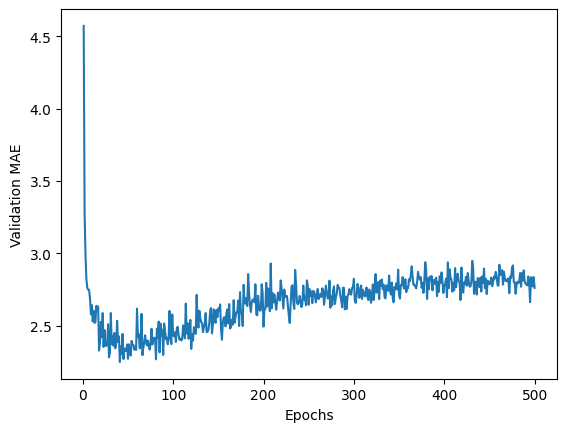

In [130]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

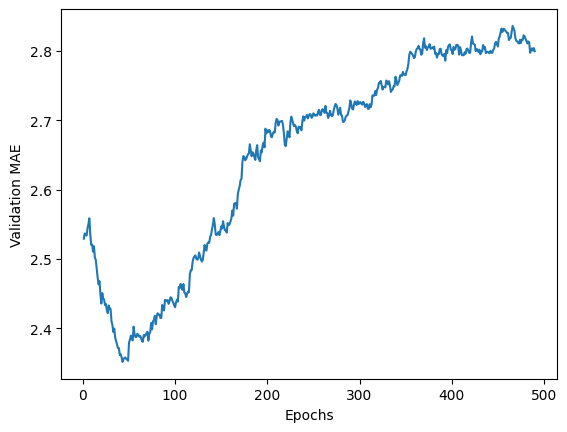

In [131]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [132]:
model = build_model()                                                     #1
model.fit(train_data, train_targets,                                      #2
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

#1 - Gets a fresh, compiled model
#2 - Trains it on the entirety of the data
         

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4042 - mae: 2.5724


In [133]:
test_mae_score

2.7105300426483154